<a href="https://colab.research.google.com/github/neladwi/Posttest_2_Data_Mining/blob/main/078_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [228]:
#import library
import pandas as pd 

In [229]:
#membaca dataset
df = pd.read_csv("dataset_market_basket.csv")

In [230]:
#menampilkan dataset
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [231]:
#menghitung total dari setiap item 
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [232]:
#item apa saja yang terdapat dalam tabel
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate',
       'frozen meals', 'dental care', 'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

#Menampilkan kemungkinan kombinasi 2 item set yang bisa terjadi 

In [233]:
#menampilkan 2 item set
from itertools import permutations #impor permutasi dari modul itertools

rules = list(permutations(df.columns, 2)) #menyimpan seluruh kemungkinan kombinasi item
rules #menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

# Menampilkan kombinasi item pada dataset

In [234]:
rule_baru = [] #menyimpan data dalam bentuk list
for rule in rules: #perulangan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: #menentukan kombinasi ada atau tidak
    rule_baru.append(rule) #menambahkan hasil di dalam list
rule_baru #menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

# Menampilkan jumlah data yang ada pada item

In [235]:
hitung = {} #ganti dictionary
for rule in rule_baru: #perulangan dataset
  banyak_data= len(df[ 
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ]) #menghitung banyak data
  hitung[str(rule)] = banyak_data #menampilkan hasil hitung banyak data

hitung #menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

# LIST SUPPORT

In [236]:
supp = [i/len(df)*100 for i in hitung.values()]

print("---")
for item,ab in hitung.items():
  print(f"{item} support = {round(ab/len(df)*100)}%")

---
('whole milk', 'pasrty') support = 5%
('whole milk', 'salty snack') support = 5%
('whole milk', 'sausage') support = 11%
('whole milk', 'semi-finished bread') support = 5%
('whole milk', 'yogurt') support = 5%
('whole milk', 'soda') support = 5%
('whole milk', 'rolls/buns') support = 5%
('whole milk', 'butter') support = 5%
('pasrty', 'whole milk') support = 5%
('pasrty', 'salty snack') support = 5%
('salty snack', 'whole milk') support = 5%
('salty snack', 'pasrty') support = 5%
('salty snack', 'root vegetables') support = 5%
('salty snack', 'detergent') support = 5%
('sausage', 'whole milk') support = 11%
('sausage', 'semi-finished bread') support = 5%
('sausage', 'yogurt') support = 5%
('sausage', 'hygiene articles') support = 5%
('sausage', 'rolls/buns') support = 11%
('semi-finished bread', 'whole milk') support = 5%
('semi-finished bread', 'sausage') support = 5%
('semi-finished bread', 'yogurt') support = 5%
('yogurt', 'whole milk') support = 5%
('yogurt', 'sausage') support

# LIST CONFIDENCE

In [237]:
print("---")
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pasrty confidence = 20.0%
whole milk->salty snack confidence = 20.0%
whole milk->sausage confidence = 40.0%
whole milk->semi-finished bread confidence = 20.0%
whole milk->yogurt confidence = 20.0%
whole milk->soda confidence = 20.0%
whole milk->rolls/buns confidence = 20.0%
whole milk->butter confidence = 20.0%
pasrty->whole milk confidence = 100.0%
pasrty->salty snack confidence = 100.0%
salty snack->whole milk confidence = 50.0%
salty snack->pasrty confidence = 50.0%
salty snack->root vegetables confidence = 50.0%
salty snack->detergent confidence = 50.0%
sausage->whole milk confidence = 50.0%
sausage->semi-finished bread confidence = 25.0%
sausage->yogurt confidence = 25.0%
sausage->hygiene articles confidence = 25.0%
sausage->rolls/buns confidence = 50.0%
semi-finished bread->whole milk confidence = 100.0%
semi-finished bread->sausage confidence = 100.0%
semi-finished bread->yogurt confidence = 100.0%
yogurt->whole milk confidence = 100.0%
yogurt->sausage confidence

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

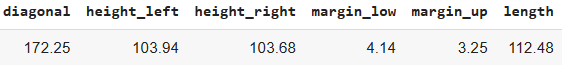
<!-- 1412 -->

In [238]:
#import library
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [239]:
#membaca dataset
df2 = pd.read_csv('deteksi_uang_palsu.csv')

In [240]:
#menampilkan dataset
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


# 1. Menambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [241]:
#menentukan target prediksi
target = pd.DataFrame({'diagonal'   : [172.25],
                      'height_left' : [103.94],
                      'height_right': [103.68],
                      'margin_low'  : [4.14],
                      'margin_up'   : [3.25],
                      'length'      : [112.48]})

#membuat kolom jarak
df2['jarak'] = euclidean_distances(df2[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], target)

#menampilkan tabel jarak
print('Tabel Jarak: ')
print(df2['jarak'])

#menampilkan semua kolom dan baris pada dataset
pd.set_option('display.max_columns', None)

#mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

#menampilkan tabel jarak
print('Tabel Jarak: ')
print(df2)

Tabel Jarak: 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: jarak, dtype: float64
Tabel Jarak: 
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70      

# 2. Mengurutkan data berdasarkan K jarak terdekat 


In [242]:
#mengurutkan data dari terkecil ke terbesar
urut = df2.sort_values('jarak')

#menentukan nilai K
k = int(np.sqrt(len(df2)))

#menentukan data terdekat
jarak_terdekat = sorted_data.head(k)

#menampilkan data terdekat
print(jarak_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


# 3. Menentukan hasil prediksi berdasarkan label terbanyak

In [353]:
df = pd.read_csv("deteksi_uang_palsu.csv")

#hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

#tampilkan label terbanyak
print("Hasil Prediksi:", label_counts.idxmax())

Hasil Prediksi: True


# (3) Analisis

> Nama : Nela Dwi Anggraini

> Nim : 2109116078


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Judul:
# Salary Prediction Dataset

# Business Understanding

*Salary prediction dataset* adalah kumpulan data yang berisi informasi tentang gaji karyawan di suatu perusahaan. Setiap baris mewakili karyawan yang berbeda, dan kolom menyertakan informasi seperti usia, jenis kelamin, tingkat pendidikan, jabatan, pengalaman kerja, dan gaji.

Tujuan utama dari dataset ini adalah untuk memprediksi gaji karyawan di suatu perusahaan berdasarkan beberapa faktor, seperti usia, jenis kelamin, tingkat pendidikan, jabatan, pengalaman kerja. 

Dalam *bisnis understanding*, penting halnya untuk menjaga keamanan dan privasi data, serta integritas data.

# Data Understanding

# Collect Initial Data

Data : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

In [288]:
import pandas as pd
df3 = pd.read_csv("Salary_Data.csv")
df3

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [289]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education_Level      373 non-null    object 
 3   Job_Title            373 non-null    object 
 4   Years_of_Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [290]:
df3.describe()

,Age,Years_of_Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [291]:
df3.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [292]:
df3.tail()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


# Describe Data
Data set yang di gunakan memiliki 5110 baris data pasien Stroke yang tersusun 12 kolom.
Dalam bagian ini, akan menampilkan seluruh data pelanggan beserta deskripsi dari setiap kolom yang berguna. dan selajutnya akan divisualisasikan agar dapat lebih mudah di pahami.

In [293]:
df3

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [295]:
print("Kolom:")
for col in df3.columns:
  print(col)

Kolom:
Age
Gender
Education_Level
Job_Title
Years_of_Experience
Salary


Dataset *Salary Prediction* memiliki 6 kolom dengan penjelasan sebagai berikut:
1. Usia: Kolom ini menunjukkan usia setiap karyawan dalam tahun. Nilai dalam kolom ini adalah numerik.

2. Jenis Kelamin: Kolom ini berisi jenis kelamin masing-masing karyawan, bisa laki-laki atau perempuan. Nilai dalam kolom ini bersifat kategorikal.

3. Tingkat Pendidikan: Kolom ini berisi tingkat pendidikan masing-masing karyawan, bisa SMA, S1, S2, atau S3. Nilai dalam kolom ini bersifat kategorikal.

4. Jabatan: Kolom ini berisi jabatan masing-masing karyawan. Judul pekerjaan dapat bervariasi tergantung pada perusahaan dan mungkin termasuk posisi seperti manajer, analis, insinyur, atau administrator. Nilai dalam kolom ini bersifat kategorikal.

5. Pengalaman Kerja: Kolom ini menunjukkan jumlah tahun pengalaman kerja setiap karyawan. Nilai dalam kolom ini adalah numerik.

6. Gaji: Kolom ini mewakili gaji tahunan setiap karyawan dalam dolar AS. Nilai dalam kolom ini adalah numerik dan dapat bervariasi tergantung pada faktor seperti jabatan, pengalaman kerja, dan tingkat pendidikan.

# Eksplore Data

Visualisasi data menggunakan countplot, histplot, dan scatterplot

Perbandingan jumlah wanita dan pria pada tingkat pendidikan

<Axes: xlabel='Education_Level', ylabel='count'>

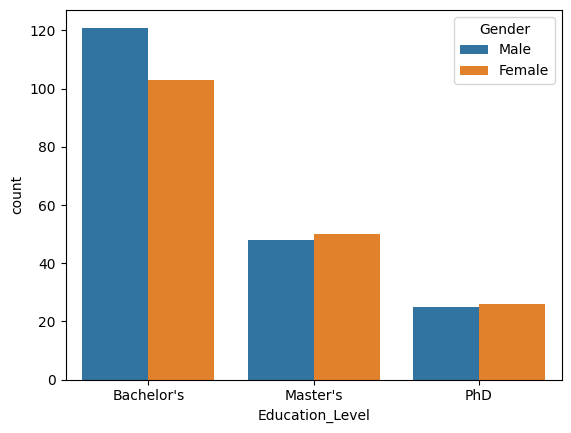

In [302]:
import seaborn as sns
sns.countplot(data=df3,x="Education_Level",hue="Gender")

<Axes: xlabel='Salary', ylabel='Count'>

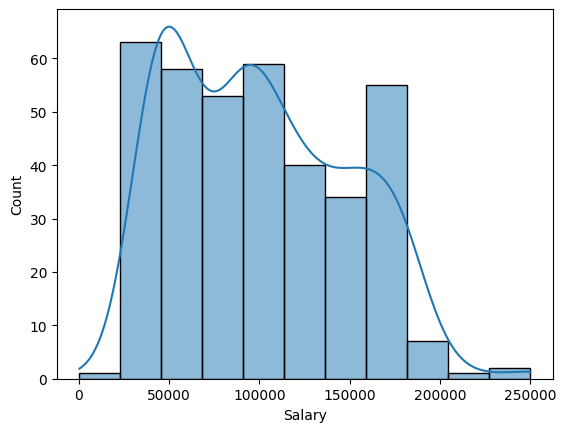

In [312]:
sns.histplot(data=df3,x="Salary",kde=True)

<Axes: xlabel='Age', ylabel='Salary'>

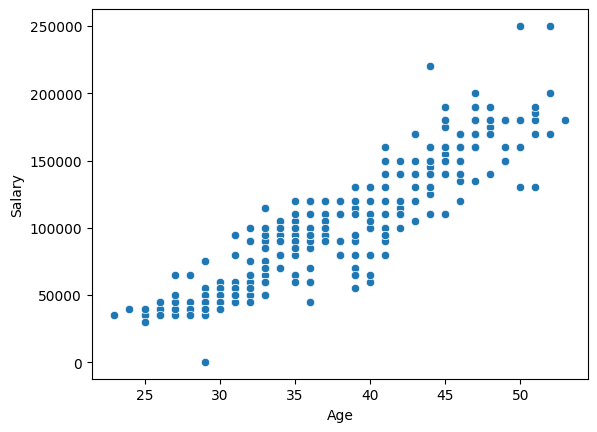

In [307]:
sns.scatterplot(data=df3,x="Age",y="Salary")

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


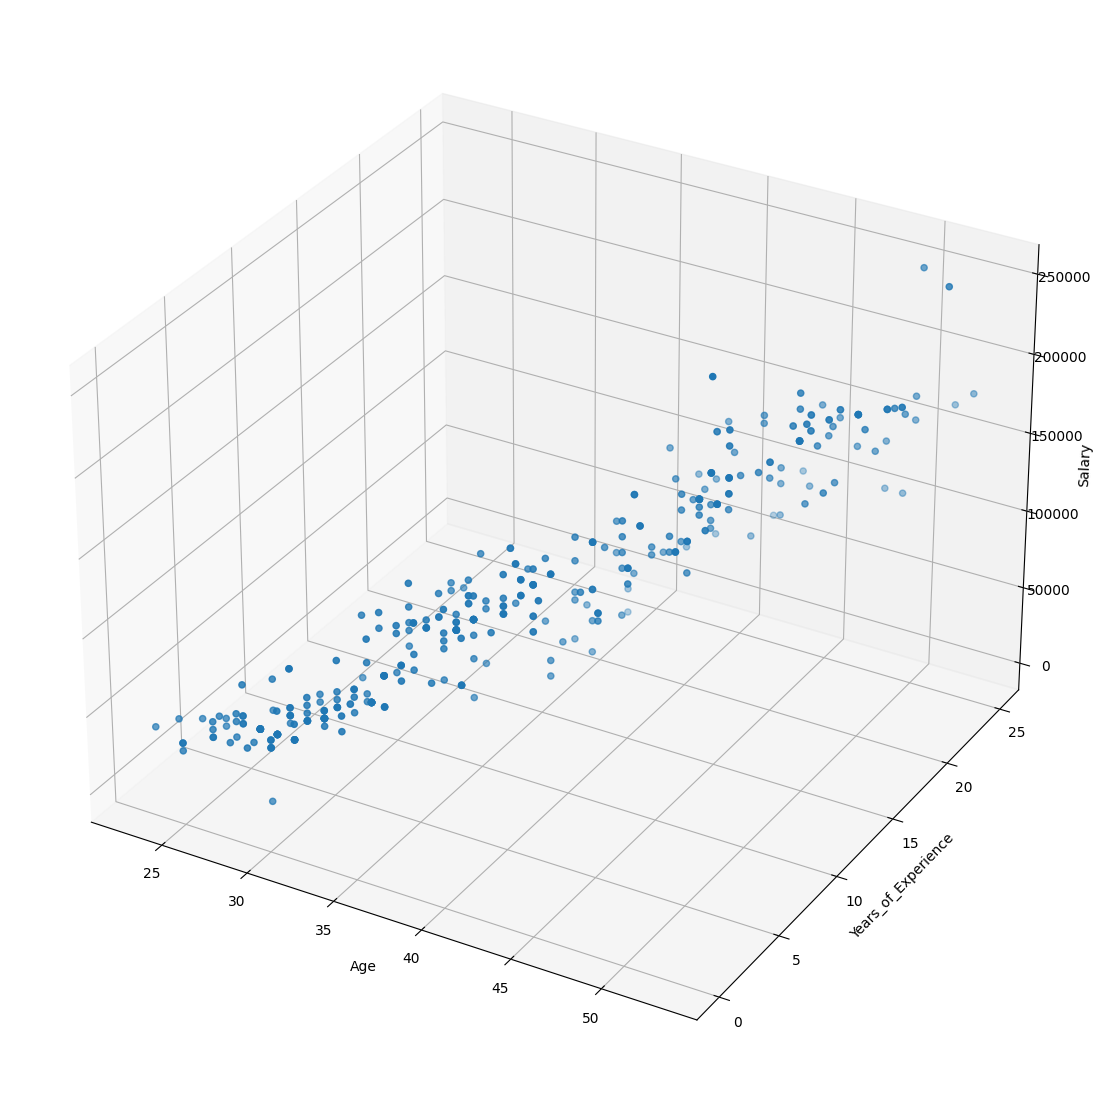

In [309]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['Age'],df3['Years_of_Experience'],df3['Salary'])

axes.set_xlabel('Age')
axes.set_ylabel('Years_of_Experience')
axes.set_zlabel('Salary')
plot.show()

# Verify Data Quality

Vefifikasi data dilakukan untuk memeriksa kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

In [318]:
#cek missing values
missing_values = df3.isnull().sum()
print("Missing Values:\n", missing_values)

#cek duplikasi data
duplicate_rows = df3.duplicated()
print("Duplikasi Data:", duplicate_rows.sum())

#cek outliers
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

#cek tipe data
print("Tipe Data:\n", df3.dtypes)


Missing Values:
 Age                    2
Gender                 2
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 2
dtype: int64
Duplikasi Data: 50
Outliers:
 Age                    0.0
Education_Level        0.0
Gender                 0.0
Job_Title              0.0
Salary                 0.0
Years_of_Experience    0.0
beef                   0.0
butter                 0.0
butter milk            0.0
canned beer            0.0
cling film/bags        0.0
curd                   0.0
dental care            0.0
detergent              0.0
dish cleaner           0.0
frankfurter            0.0
frozen meals           0.0
frozen vegetables      0.0
hygiene articles       0.0
misc. beverages        0.0
other vegetables       0.0
pasrty                 0.0
pickled vegetables     0.0
rolls/buns             0.0
root vegetables        0.0
salty snack            0.0
sausage                0.0
semi-finished bread    0.0
soda                   0.0
special

<ipython-input-318-41e8757e64c5>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum()


# Data Preparation

#Select Data

In [341]:
#menampikan 2 Kolom
selected_data = df3[["Salary", "Years_of_Experience"]]

print(selected_data.head())

     Salary  Years_of_Experience
0   90000.0                  5.0
1   65000.0                  3.0
2  150000.0                 15.0
3   60000.0                  7.0
4  200000.0                 20.0


In [338]:
#menampikan 3 Kolom
selected_data = df3[["Salary", "Years_of_Experience", "Gender"]]

print(selected_data.head())

     Salary  Years_of_Experience    Gender
0   90000.0                  5.0  -89968.0
1   65000.0                  3.0  -64972.0
2  150000.0                 15.0 -149955.0
3   60000.0                  7.0  -59964.0
4  200000.0                 20.0 -199948.0


#Clean Data

In [339]:
df3.isna().sum()

Age                    0
Gender                 0
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 0
dtype: int64

In [340]:
df3.isna().sum() / len(df3) * 100

Age                    0.000000
Gender                 0.000000
Education_Level        0.533333
Job_Title              0.533333
Years_of_Experience    0.533333
Salary                 0.000000
dtype: float64

In [330]:
df3["Gender"] = df3["Gender"].fillna(df3["Gender"].mode()[0])
df3["Salary"] = df3["Salary"].fillna(df3["Salary"].mode()[0])
df3["Age"] = df3["Age"].fillna(df3["Age"].mode()[0])

In [331]:
df3.isna().sum()

Age                    0
Gender                 0
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 0
dtype: int64

In [333]:
df3.isna().sum() / len(df3) * 100

Age                    0.000000
Gender                 0.000000
Education_Level        0.533333
Job_Title              0.533333
Years_of_Experience    0.533333
Salary                 0.000000
dtype: float64

#Construct Data

In [337]:
df3["Gender"] = df3["Age"] - df3["Salary"]

print(df3.head())

    Age    Gender Education_Level          Job_Title  Years_of_Experience    Salary
0  32.0  -89968.0      Bachelor's  Software Engineer                  5.0   90000.0
1  28.0  -64972.0        Master's       Data Analyst                  3.0   65000.0
2  45.0 -149955.0             PhD     Senior Manager                 15.0  150000.0
3  36.0  -59964.0      Bachelor's    Sales Associate                  7.0   60000.0
4  52.0 -199948.0        Master's           Director                 20.0  200000.0


In [344]:
df3 = pd.get_dummies(df3)
print(df3)

   Years_of_Experience_2.0  Years_of_Experience_3.0  Years_of_Experience_5.0  Years_of_Experience_7.0  Job Title_Data Analyst  Job Title_Junior Project Manager  Job Title_Sales Associate  \
0                        1                        0                        0                        0                       0                                 1                          0   
1                        0                        1                        0                        0                       1                                 0                          0   
2                        0                        0                        1                        0                       0                                 0                          0   
3                        0                        0                        0                        1                       0                                 0                          1   

   Job Title_Software Engineer  
0               